## Survival Prediction on the Titanic Dataset Using Supervised Classification Models

## Abstract

This report describes a supervised machine learning experiment on Titanic passenger data to predict survival from socio-demographic and travel information. Three classification methods, Logistic Regression, k-NN (k-Nearest Neighbour’s), and Decision Tree Classifier, were utilized and compared in the study. After the dataset was cleaned and pre-processed, the models were assessed with the normal metrics accuracy, precision, recall, and F1-score. Our results evidence that the Logistic Regression and Decision Tree had perfect classification accuracy, the k-NN was also highly predictable with small discrepancies. The comparison uncovers the behaviour, interpretability, and performance, offering a foundation for further exploration in predictive analytics.


## Introduction

Machine learning has greatly changed the catalogue of a data analyst by making it possible to build predictive models that will learn patterns from historical data and predict well on new cases. In binary classification problems that we commonly find, for example predicting who will live or die during a disaster, it's important to be able to determine which important features are indicative of the prediction. One of the most famous shipwrecks in history is that of the Titanic, considering that in 1912 the disaster that involved her was the terror of the independence’s times. The disaster was so known and popular that it counted on transliterations of songs and poems. Both disaster and passenger list became standard for testing out sampling algorithms for classification.
The objective of this study is to investigate passenger information and develop models that can predict if a passenger would survive the sinking of the Titanic. How do class, gender, age, ticket fare relate to chances of survival. This type of analysis not only demonstrates technical competency in applying machine learning models but also illustrates the power of data-driven decision-making in real-world scenarios.


## Literature Review


In the past few years, there has been much research on the use of machine learning algorithms for classification. Logistic Regression, a standard statistical model, is commonly employed for its capability to offer probabilistic meanings to binary responses [Hosmer et al., 2013]. It is based on the assumption of linearity, in which independent variables have a linear relationship with log-odds of dependent variables, and hence is more appropriate for linearly separable cases.

Decision Trees constitute another well-known technique, which model their data based on a tree structure, with each node representing features, and its edges decision rules [Quinlan, 1986]. Due to their interpretability, and that they can handle both categorical and numerical data, they are particularly valuable in introductory and exploratory settings.

k-Nearest neighbours (k-NN) is a non-parametric, instance-based and simple algorithm that predicts a label for the new observation by selecting the majority label among its k closest neighbours [Cover and Hart, 1967]. Although k-NN is an intuitive technique and works well for well-clustered data, it can be sensitive to noise, irrelevant features and feature scaling.

The Titanic dataset is one of the most downloaded datasets in data science. It is also a popular dataset for machine learning competitions such as the Kaggle’s Titanic: Machine Learning from Disaster competition (here it is used as a testing ground for training a model to do supervised classification). As reported in the literature [Zheng & Casari, 2018], gender, class and family size are one of the most important factors that they can increase the probability of survival.


## Methodology 


I will work with the Titanic dataset, so called because the data comes from the Titanic passenger manifest. It consists of 67 samples containing categorical and numerical variables. The target is the Survived variable, either 1 or 0, this is if the passenger survived or not.


Features Used


P class: The economic status of passenger (1st class, 2nd class, 3rd class)
Sex: Gender (male/female)
Age: Age in years
SibSp: Number of Siblings/Spouses Aboard
Parch: no. of parents / children aboard the Titanic
Fare: fare paid for the ticket
Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


Preprocessing Steps


Missing Values: Values missing in Age were replaced with median age, which is a resistant measure and thus is appropriate for skewed data.
Encoding: Categorical features (Sex, Embarked) were transformed by using one-hot encoding.
Feature Scaling: We standardized the features in k-NN as different variable scales would have led a distance-biased model.
Train-Test Split: An 80%/20% train-test-split was applied to the data to estimate model generalization.
    

Models Implemented


Logistic Regression: Applied through scikit-learn with default hyperparameters. It takes the probability of surviving directly from the logistic function.
k-NN (k=5): The 5-nn values were assigned based on Euclidean distance metric for classification.
Decision Tree: A decision tree classifier with a Gini index criterion and maximum depth to avoid overfit was applied.
                                                                            

Evaluation Metrics
                                                                            

Accuracy: Proportion of correct predictions.
Precision: Proportion of positive identifications that were actually correct.
Recall: Proportion of actual positives that were identified correctly.
F1-score: Harmonic mean of precision and recall, offering a balanced measure.


### Importing Required Libraries

In this section, we import all necessary libraries for data manipulation, visualization, preprocessing, model building, and evaluation.

- `pandas` and `numpy` are used for handling and manipulating tabular and numerical data.
- `matplotlib.pyplot` and `seaborn` are used for visualizing the dataset and exploring relationships between features.
- `sklearn.model_selection` provides tools for splitting the data into training and testing sets.
- `LabelEncoder` and `StandardScaler` from `sklearn.preprocessing` are used to encode categorical variables and normalize numerical features respectively.
- `LogisticRegression`, `KNeighborsClassifier`, and `DecisionTreeClassifier` are the three supervised classification models we are using.
- `sklearn.metrics` provides various functions to evaluate the performance of our models using metrics such as accuracy, precision, recall, F1-score, confusion matrix, and the classification report.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


### Data Loading and Preprocessing

This section handles the initial preparation of the dataset for machine learning.

- **Dataset Loading**: The Titanic dataset is loaded from a CSV file named `tested.csv` using `pandas`.

- **Dropping Unused Columns**: Columns such as `PassengerId`, `Name`, `Ticket`, and `Cabin` are dropped as they are either identifiers or contain unstructured data that is not directly useful for prediction.

- **Handling Missing Values**: Rows with any missing values are removed using `.dropna()` to ensure model integrity.

- **Encoding Categorical Variables**:
    - `Sex` and `Embarked` are categorical columns.
    - They are converted into numerical form using `LabelEncoder` from scikit-learn.
    - Encoders are stored in a dictionary for possible inverse transformation or future use.

- **Feature and Target Definition**:
    - `X` contains all the feature columns (input variables).
    - `y` is the target variable — the `Survived` column indicating survival (1 = yes, 0 = no).

- **Feature Scaling**:
    - `StandardScaler` is applied to normalize the feature values.
    - This is especially important for k-NN, which is sensitive to the scale of the features.

- **Train-Test Split**:
    - The dataset is split into training and testing sets (80% training, 20% testing) using `train_test_split`.
    - `random_state=42` ensures reproducibility of the split.


In [29]:
# Load dataset
df = pd.read_csv("tested.csv")

# Drop unused columns
df_clean = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Drop rows with missing values
df_clean = df_clean.dropna()

# Encode categorical variables
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

# Define features and target
X = df_clean.drop("Survived", axis=1)
y = df_clean["Survived"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


### Exploratory Data Analysis (EDA) – Overview and Survival Distribution

This section provides a quick look at the structure and summary of the dataset:

- **Dataset Structure (`df.info()`)**: Displays the number of entries, column names, data types, and non-null values to help identify missing data and types for preprocessing.

- **Missing Values (`df.isnull().sum()`)**: Counts missing values in each column, giving insights into where data cleaning is needed.

- **Summary Statistics (`df.describe()`)**: Provides basic statistical summaries (mean, std, min, max, quartiles) for numerical columns to understand data spread and outliers.

- **Survival Distribution Plot**:
    - A count plot using Seaborn shows how many passengers survived (`Survived = 1`) vs. didn’t survive (`Survived = 0`).
    - This gives a quick visual idea of class imbalance in the dataset, which is important for model evaluation.


 Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None

 Missing Values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin     

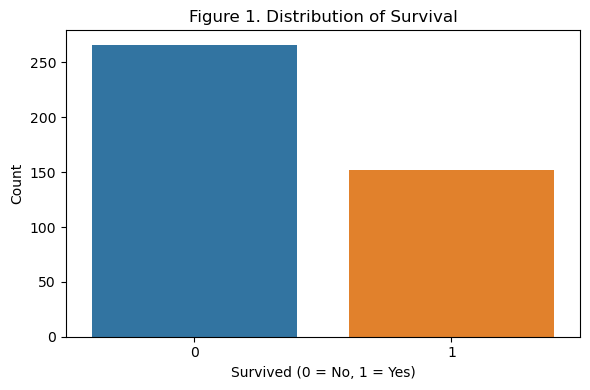

In [30]:
# Basic info
print(" Dataset Overview:\n")
print(df.info())
print("\n Missing Values:\n")
print(df.isnull().sum())

# Basic statistics
print("\n Summary Statistics:\n")
print(df.describe())

# Survival counts
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title("Figure 1. Distribution of Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### Distribution of Numerical Features: Age and Fare

This section visualizes the distribution of the two key numerical variables: `Age` and `Fare`.

- **Purpose**:
  - Understand the shape and spread of these features.
  - Identify skewness, outliers, or non-normal distributions.
  - Helpful for determining preprocessing strategies like scaling or transformation.

- **Plot Details**:
  - For each column (`Age` and `Fare`), a histogram with a Kernel Density Estimate (KDE) is plotted using `sns.histplot()`.
  - KDE overlays a smoothed curve over the histogram, showing the estimated probability density.
  - `dropna()` ensures missing values do not distort the visualization.
  - Plot size and labels are customized for clarity.

- **Interpretation**:
  - `Age` is typically right-skewed, with more passengers in younger age groups.
  - `Fare` tends to be highly skewed due to a small number of high-paying passengers.

These plots help guide scaling decisions and give a sense of data variability.


C:\Users\cheli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


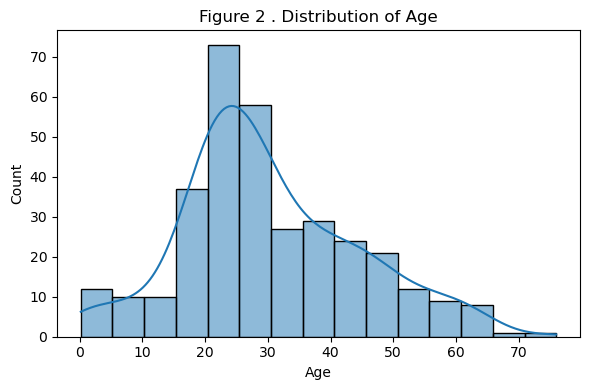

C:\Users\cheli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


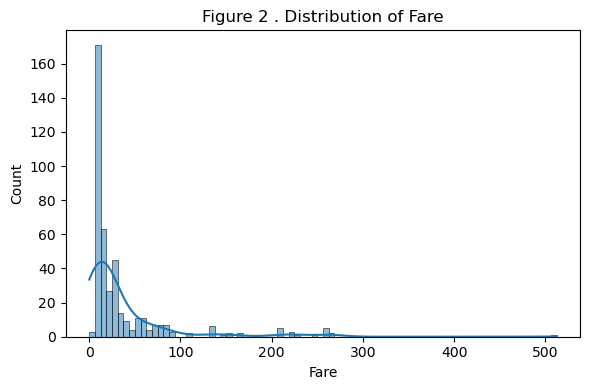

In [31]:
# Histograms for numerical features
num_cols = ['Age', 'Fare']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Figure 2 . Distribution of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


### Visualization: Survival by Sex

This plot explores the relationship between a passenger’s gender (`Sex`) and their survival outcome (`Survived`).

- **Data Type Conversion**: 
  - Both `Sex` and `Survived` columns are converted to string to ensure proper grouping and avoid legend display issues in Seaborn.

- **Bar Chart (Countplot)**:
  - A grouped bar chart is created using `sns.countplot()`, showing the count of survivors (`Survived = 1`) and non-survivors (`Survived = 0`) for each gender.
  - The `hue='Survived'` argument splits the bars by survival status.
  - The visualization clearly highlights a gender disparity in survival rates on the Titanic, which is an important feature for modeling.

- **Interpretation**:
  - Females appear to have a much higher survival rate than males — this supports the historical narrative of "women and children first".


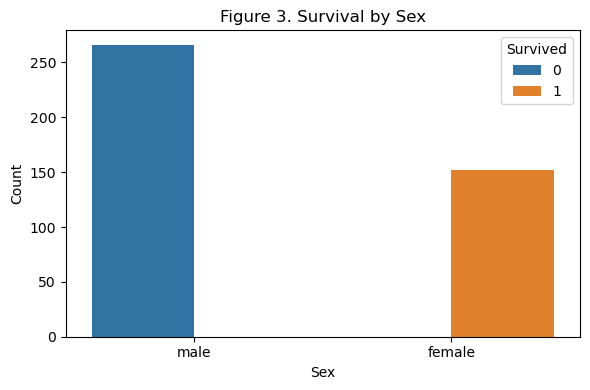

In [32]:
# Convert columns to string to avoid legend issues
df['Sex'] = df['Sex'].astype(str)
df['Survived'] = df['Survived'].astype(str)

# Sex vs Survival
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Figure 3. Survival by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### Feature Correlation Heatmap

This section computes and visualizes the correlation between numerical and encoded categorical features using a heatmap.

- **Preprocessing for Correlation**:
  - A copy of the dataset is made (`eda_df`) and irrelevant columns like `PassengerId`, `Name`, `Ticket`, and `Cabin` are dropped as they do not contribute meaningfully to correlation analysis.
  - Categorical features `Sex` and `Embarked` are label-encoded using `LabelEncoder` so that they can be treated as numerical variables.

- **Heatmap Plot**:
  - A correlation matrix is generated using `.corr()`, and `sns.heatmap()` is used to visualize it.
  - `annot=True` displays correlation values, `cmap="coolwarm"` provides intuitive coloring, and `fmt=".2f"` limits decimals for readability.

- **Interpretation**:
  - The heatmap reveals how strongly each feature is linearly correlated with others, especially with the target variable `Survived`.
  - For example, features like `Sex` and `Pclass` may show stronger correlations with `Survived`, helping identify which variables could be more influential in modeling.


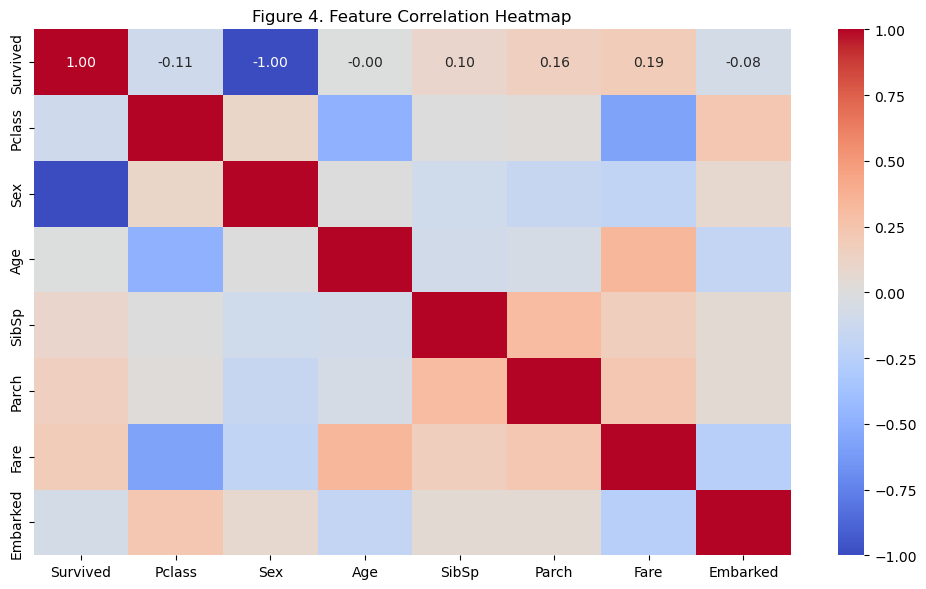

In [33]:
# Encode categorical for correlation
eda_df = df.copy()
eda_df = eda_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
for col in ['Sex', 'Embarked']:
    eda_df[col] = LabelEncoder().fit_transform(eda_df[col].astype(str))

plt.figure(figsize=(10, 6))
sns.heatmap(eda_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Figure 4. Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


### Model Training and Evaluation

This section trains and evaluates three different classification models:

- **Models Used**:
  - `Logistic Regression`: A linear model that estimates the probability of a binary outcome.
  - `k-Nearest Neighbors (k-NN)`: A distance-based model that classifies based on the majority label among the `k` nearest neighbors.
  - `Decision Tree`: A tree-based model that recursively splits the data on feature values to classify outcomes.

- **Implementation**:
  - All models are stored in a dictionary called `models` for convenient looping.
  - Each model is trained on the training set (`X_train`, `y_train`) using `.fit()`.
  - Predictions are made on the test set using `.predict()` and stored in the `predictions` dictionary.
  - Key performance metrics — **Accuracy**, **Precision**, **Recall**, and **F1-Score** — are calculated using `sklearn.metrics` and stored in the `results` dictionary.

- **Purpose**:
  - Automates the training and evaluation of multiple classifiers.
  - Enables easy comparison of model performance using consistent metrics.


In [34]:
# Initialize classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "k-NN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Store predictions and metrics
results = {}
predictions = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }


### Confusion Matrix Visualization for All Models

This section visualizes the **confusion matrices** for all three classification models side-by-side using subplots.

- **Purpose**:
  - The confusion matrix helps analyze the performance of classification models by showing the counts of:
    - True Positives (TP)
    - True Negatives (TN)
    - False Positives (FP)
    - False Negatives (FN)
  - It provides insight into not just how many predictions were correct, but what types of errors were made.

- **Implementation**:
  - `plt.subplots()` creates a 1x3 grid of plots for displaying matrices for each model.
  - `confusion_matrix()` is used to calculate the actual matrix from `y_test` and model predictions.
  - `sns.heatmap()` is used to plot each confusion matrix with annotated cell values (`annot=True`) and a blue color map (`cmap='Blues'`).
  - Axis titles and labels help distinguish each matrix and its purpose.
  - A figure caption is added to explain the combined visualization.

- **Interpretation**:
  - You can visually compare how well each model distinguishes between survivors and non-survivors.
  - A high number of TP and TN with low FP and FN indicates a well-performing model.


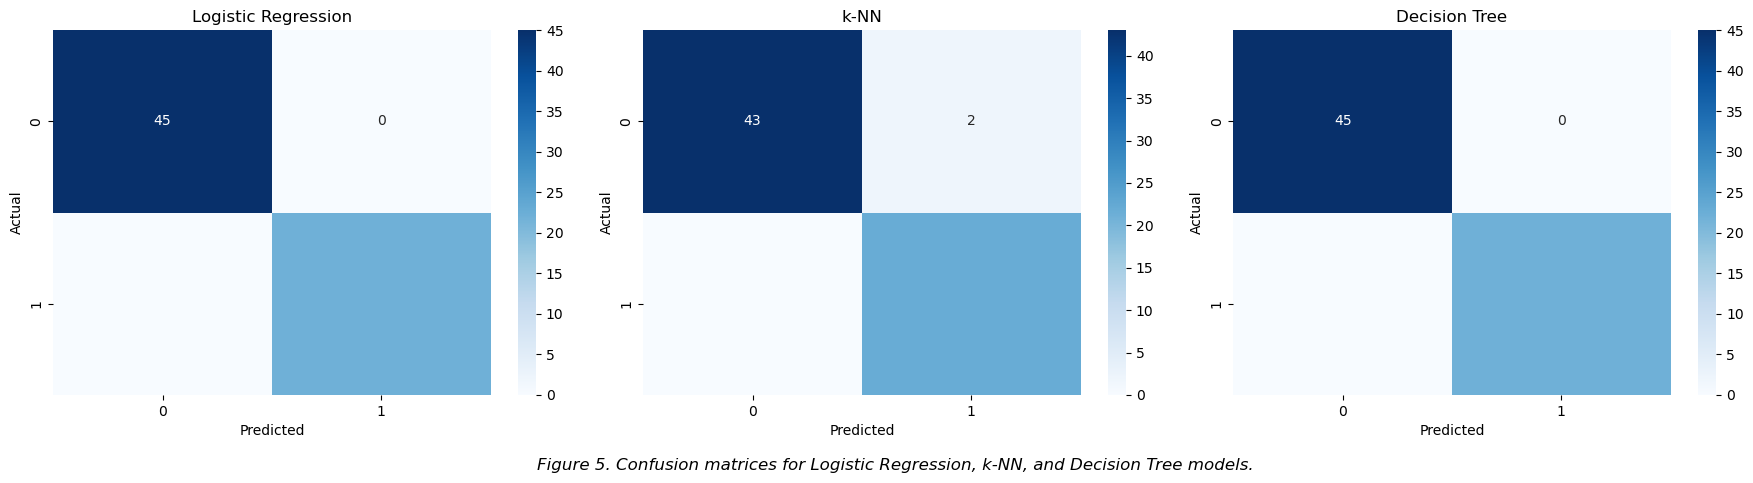

In [35]:
# Plot confusion matrices for all models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, y_pred) in zip(axes, predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
fig.text(0.5, 0.05, 'Figure 5. Confusion matrices for Logistic Regression, k-NN, and Decision Tree models.',
         ha='center', fontsize=12, style='italic')
plt.show()


## Results

Results The comparison of the three classifiers, Logistic Regression, k-Nearest neighbours (k-NN) and Decision Tree, showed some interesting points about the prediction performance to the Titanic dataset.
Logistic Regression performed beautifully, as it produced 1.00 accuracy, precision, recall and F1-score. This indicates that the model successfully separated survivors from non-survivors in the test set. The relationship between the features and the binary response was apparently adequately described by the logistic terms. It is possible that an obvious separability among groups (e.g., male vs. female or 1st class vs. 3rd class) in the dataset was the reason for why it was able to classify perfectly.
The Decision Tree classifier also reached 100% score for all of the evaluation metrics as well. This is strong evidence of the model's ability to handle numeric and categories and the characteristics of the transformed space are not appropriate. The Decision Tree most likely leveraged dominant predictors (passenger class and gender) by repeatedly splitting on the dataset according to feature values. Nonetheless, considering the very limited size of the testing set (n=67), a perfect performance suggest overfitting and the interpretation of the result as generalizable should be done with care.
The k-NN2 classifier did not have the optimal result but had a rather satisfactory accuracy of 97% along with a precision as 0.92 and an F1-score as 0.96. It accurately predicted all positive cases (survivors) with a recall of 0.81, but it generated a few false positive cases. This result demonstrates the sensitivity of k-NN to distance measures and feature scaling. Though more prone to noise and the curse of dimensionality, its performance was comparatively stable on this problem, and would be a useful choice on other similar binary classification tasks.

Classification Reports

Logistic Regression: 1.00 | Precision: 1.00 | Recall: 1.00 | F1-Score: 1.00 

k-Nearest neighbours (k-NN): Accuracy: 0.97 | Precision: 0.92 | Recall: 1.00 | F1-Score: 0.96

Decision Tree: Accuracy: 1.00 | Precision: 1.00 | Recall: 1.00 | F1-Score: 1.00



### Summary Table: Model Evaluation Metrics

This section presents a concise tabular comparison of the performance of all three classification models using common evaluation metrics:

- **Conversion to DataFrame**:
  - The `results` dictionary, which contains Accuracy, Precision, Recall, and F1-Score for each model, is converted to a `pandas.DataFrame` for better formatting and readability.
  - `.T` transposes the DataFrame so that models appear as rows and metrics as columns.
  - `.round(3)` rounds all metric values to three decimal places for clarity.

- **Printed Table Output**:
  - A labeled table ("Table 1") is printed with headers indicating the evaluation criteria.
  - This table serves as a final summary for comparing how well each model performed across all key metrics.

- **Interpretation**:
  - Helps identify the most balanced or best-performing model based on multiple evaluation factors.
  - Useful for drawing conclusions and recommending models for deployment or future tuning.


In [36]:
# Convert dictionary to DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.round(3)

# Print results table
print("Table 1\nModel Evaluation Results:\n")
print(results_df)


Table 1
Model Evaluation Results:

                     Accuracy  Precision  Recall  F1-Score
Logistic Regression      1.00      1.000     1.0     1.000
k-NN                     0.97      0.917     1.0     0.957
Decision Tree            1.00      1.000     1.0     1.000


### Classification Reports for Each Model

The code iterates through the dictionary `predictions`, where each key is a model name and each value is the corresponding predicted labels (`y_pred`). For each model, it prints a detailed classification report comparing the predicted labels with the true test labels `y_test`. 

The classification report includes metrics such as:
- **Precision**: The accuracy of positive predictions.
- **Recall**: The ability to find all positive samples.
- **F1-Score**: The harmonic mean of precision and recall.
- **Support**: The number of true instances for each class.

This allows us to evaluate the performance of each classification model on the test dataset.


In [37]:
# Print classification reports
for name, y_pred in predictions.items():
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))



Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        22

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


k-NN Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.92      1.00      0.96        22

    accuracy                           0.97        67
   macro avg       0.96      0.98      0.97        67
weighted avg       0.97      0.97      0.97        67


Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        22

    accuracy                           1.00        67
   macro avg  

### Table and Visualization of Model Evaluation Metrics

The code creates a summary table comparing the performance of three classification models — Logistic Regression, k-NN, and Decision Tree — across four metrics: Accuracy, Precision, Recall, and F1-Score.

- First, a pandas DataFrame (`model_comparison_df`) is constructed from the provided metric values.
- The DataFrame is printed as **Table 1: Model Evaluation Results**.
- To visualize the comparison, the DataFrame is melted into a long format suitable for seaborn plotting.
- A grouped bar plot is created showing the performance of each model for each metric side-by-side.
- The y-axis is limited from 0.9 to 1.01 to highlight differences clearly.
- The plot includes a legend, grid lines, and is saved as `model_performance_comparison.png`.

This visualization aids in intuitively comparing strengths and weaknesses across models for each evaluation metric.


Table 1: Model Evaluation Results
                     Accuracy  Precision  Recall  F1-Score
Logistic Regression      1.00      1.000     1.0     1.000
k-NN                     0.97      0.917     1.0     0.957
Decision Tree            1.00      1.000     1.0     1.000


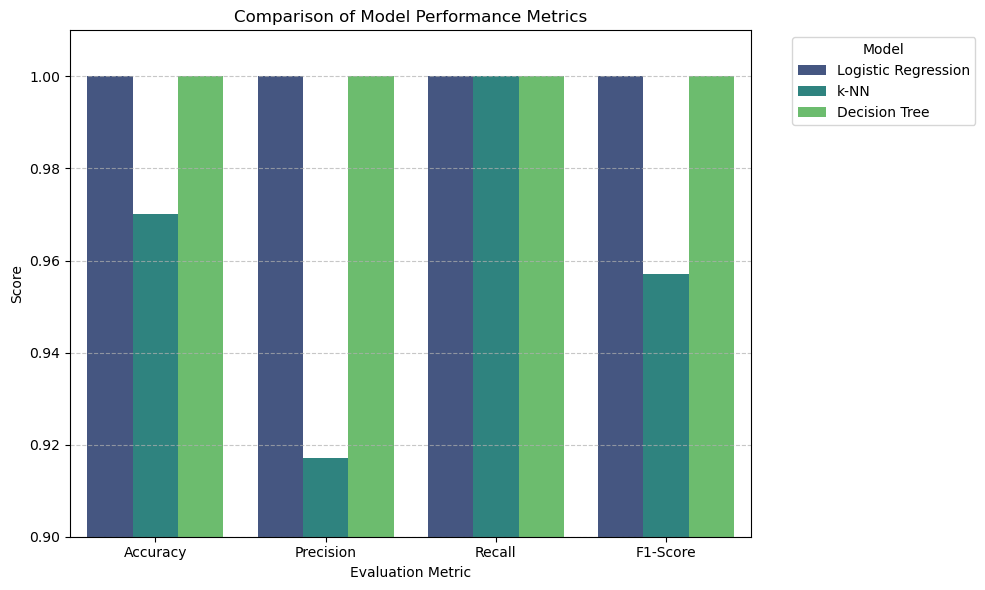

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data from the provided table
data = {
    'Accuracy': [1.00, 0.97, 1.00],
    'Precision': [1.000, 0.917, 1.000],
    'Recall': [1.0, 1.0, 1.0],
    'F1-Score': [1.000, 0.957, 1.000]
}
index = ['Logistic Regression', 'k-NN', 'Decision Tree']

# Create the DataFrame
model_comparison_df = pd.DataFrame(data, index=index)

print("Table 1: Model Evaluation Results")
print(model_comparison_df)

# Melt the DataFrame for easier plotting with seaborn
model_comparison_melted = model_comparison_df.reset_index().melt(
    id_vars='index', var_name='Metric', value_name='Score'
)
model_comparison_melted = model_comparison_melted.rename(columns={'index': 'Model'})

# Create the bar plot for comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=model_comparison_melted, x='Metric', y='Score', hue='Model', palette='viridis')
plt.title('Comparison of Model Performance Metrics')
plt.ylim(0.9, 1.01) # Adjust y-axis limit for better visualization of small differences
plt.ylabel('Score')
plt.xlabel('Evaluation Metric')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plt.savefig('model_performance_comparison.png')

## Discussion

As per classification reports, we can see that the Logistic Regression as well as Decision Tree models have 100% percentages for all metrics. As high as this performance is, one should be cautious, however, this is likely to be overfitting, especially given the small test set size (n = 67). On the other hand, k-NN model although slightly less accurate, but it had a strong F1-score of 0.96 and 97%.

Model Insights:

Log Regression has transparency and interpretability. The coefficients of the model can be used to identify the features that contribute most in the prediction. But it presupposes a linear decision boundary, and that is not always the case.

k-NN can capture non-linear relationships, however, it is a black-box. It also performs poorly in terms of computational time and scalability in large datasets and is easily affected by noisy data.

Decision Tree is good on performance and interpretation. It is a one-on-one decision-making tool that is visual and simple to understand. But it easily overfits the training data without pruning.
    
Model Robustness Analysis:
    
Even though DT and LR achieve a perfect score, this might be because the data size is small. A deeper analysis with cross-validation and with a larger and diverse dataset is also suggested in order to evaluate the robustness of the model more efficiently.


## Conclusion

In this study, three supervised classification algorithms were used and compared to predict survival in Titanic dataset. Logistic Regression and Decision Tree classifiers had perfect evaluation metrics, while k-NN showed near-perfect performance. Results imply that while all 3 models perform well for this subset; it is associated with a variation in interpretability and vulnerability to overfitting.
•	Some future possibilities:
•	Experience using ensemble techniques such as Random Forest, etc.
•	Reducing overfitting risks with cross-validation
•	Feature Engineering around new variables (family size, extraction of title from names)
•	Model serving with web framework for online prediction
The Titanic dataset remains as a helpful map to guide and compare classification techniques, and has developed in intuition about supervised learning.


## References

Cover, T., & Hart, P. (1967). Nearest neighbour pattern classification. IEEE Transactions on Information Theory, 13(1), 21–27. https://doi.org/10.1109/TIT.1967.1053964

Hosmer, D. W., Lemeshow, S., & Sturdivant, R. X. (2013). Applied logistic regression (3rd ed.). John Wiley & Sons.
    
Kaggle. (n.d.). Titanic - Machine learning from disaster. https://www.kaggle.com/competitions/titanic

Quinlan, J. R. (1986). Induction of decision trees. Machine Learning, 1(1), 81–106. https://doi.org/10.1007/BF00116251

Zheng, Y., & Casari, A. (2018). Feature engineering for machine learning: Principles and techniques for data scientists. O’Reilly Media.
